# Rotácia

Vektorovým súčinom operátora $\nabla$ s vektorovým poľom dostaneme vektorové pole, ktoré popisuje mieru vírovosti vektorového poľa, t.j. do akej miery sa v danom bode priestoru pole otáča alebo rotuje. Vektor rotácie v danom bode je v smere osi otáčania, jeho orientácia vzhľadom k rovine otáčania určíme pomocou pravidla pravej ruky.

\begin{equation}
\mathrm{curl} \, \mathbf{F} = \nabla \times \mathbf{F} = 
\begin{vmatrix} \mathbf{i} & \mathbf{j} & \mathbf{k} \\
{\dfrac{\partial}{\partial x}} & {\dfrac{\partial}{\partial y}} & {\dfrac{\partial}{\partial z}} \\
F_x & F_y & F_z \end{vmatrix} =
\left(\frac{\partial F_z}{\partial y} - \frac{\partial F_y}{\partial z}\right) \mathbf{i} + \left(\frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x} \right) \mathbf{j} + \left(\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \right) \mathbf{k} 
\end{equation}

## Rotácia v cylindrických súradniciach

\begin{equation}
\nabla \times \mathbf{F} =
\left({1 \over r}{\partial F_z \over \partial \varphi}
    - {\partial F_\varphi \over \partial z}\right) \boldsymbol{\mathbf{r}} +
\left({\partial F_r \over \partial z} - {\partial F_z \over \partial r}\right) 
    \boldsymbol{\mathbf{\varphi}} +
{1 \over r}\left({\partial ( r F_\varphi ) \over \partial r} 
    - {\partial F_r \over \partial \varphi}\right) \boldsymbol{\mathbf{z}}
\end{equation}

## Rotácia v sférických súradniciach

\begin{equation}
\nabla \times \mathbf{F} =
  {1 \over r\sin\theta}\left({\partial \over \partial \theta} ( F_\varphi\sin\theta )
    - {\partial F_\theta \over \partial \varphi}\right) \boldsymbol{\mathbf{r}} +
  {1 \over r}\left({1 \over \sin\theta}{\partial F_r \over \partial \varphi} 
    - {\partial \over \partial r} ( r F_\varphi ) \right) \boldsymbol{\mathbf{\theta}} +
  {1 \over r}\left({\partial \over \partial r} ( r F_\theta )
    - {\partial F_r \over \partial \theta}\right) \boldsymbol{\mathbf{\varphi}}
\end{equation}

## Vlastnosti rotácie

Ak $\mathbf{F}, \mathbf{G}$ sú vektorové polia, $f$ je skalárne pole, $a, b$ sú reálne čísla, potom operátor rotácie spĺňa nasledujúce identity:

- lineárita rotácie voči reálnym čislam

\begin{equation*}
\nabla\times \left(a \, \mathbf{F}+b \, \mathbf{G} \right) = 
a \nabla \times \mathbf{F}+b \nabla \times \mathbf{G}
\end{equation*}

- rotácia gradientu je nulový vektor

\begin{equation*}
\nabla\times \nabla f = \mathrm{curl} \, \mathrm{grad} \, f = \mathbf{0}
\end{equation*}

- rotácia vektorvého poľa násobeného skalárnou funkciou

\begin{equation*}
\nabla\times \left(f \mathbf{F}\right) = 
\nabla f \times \mathbf{F}+f \nabla\times\mathbf{F}
\end{equation*}

- rotácia z vektorvého súčinu dvoch vektorových polí

\begin{equation*}
\nabla\times \left(\mathbf{F} \times \mathbf{G}\right) = 
\left(\mathbf{G}\cdot\nabla\right)\mathbf{F}-\left(\mathbf{F}\cdot\nabla\right)\mathbf{G}
+\mathbf{F}\left(\nabla\cdot\mathbf{G}\right)-\mathbf{G}\left(\nabla\cdot\mathbf{F}\right)
\end{equation*}

- rotácia z rotácie vektorového poľa

\begin{equation*}
\nabla \times \left(\nabla\times \mathbf{F}\right) =
\nabla\left(\nabla\cdot\mathbf{F}\right)-\Delta \mathbf{F}
\end{equation*}


## Diskrétna aproximácia rotácie v 2D

Rotácia v $(x,y)$ rovine má len zložku v smere osi z. 

<img src="./img/rot_2d_01.png" width=400px alt="Rotácia v x-y rovine" scale="1.25"/>

\begin{equation*}
\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \approx
\frac{F_y(x +\frac{\Delta x}{2}, y) - F_y(x -\frac{\Delta x}{2}, y) }{\Delta x} -
\frac{F_x(x, y +\frac{\Delta y}{2} ) - F_x(x, y -\frac{\Delta y}{2}) }{\Delta y} 
\end{equation*}

Pre $\Delta x = \Delta y = \delta$ môžeme vzťah upraviť

\begin{equation}
\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \approx
\frac{1}{\delta} \big(
F_y(x +\frac{\delta}{2}, y) - F_y(x -\frac{\delta}{2}, y) - F_x(x, y +\frac{\delta}{2} ) - F_x(x, y -\frac{\delta}{2}) \big)
\end{equation}

## Symbolický výpočet

Pomocou symbolických manipulácií *sympy* určime rotáciu vektorového poľa v 2D rovine

\begin{equation*}
\mathbf{F}(x,y) =   \left( -y \, (1-x-y)+ \frac{x}{4} \right) \, \mathbf{i}  +   \left(2 -x^2 + \frac{y}{4} \right) \,\mathbf{j}
\end{equation*}

In [61]:
%reset -f 
from utils.utils import *
from sympy.vector import CoordSys3D, curl
r = CoordSys3D('R')
F = (-r.y*(1 - r.x - r.y**2) + r.x/4)*r.i + (2 - r.x**2 + r.y/4)*r.j
C = curl(F)

ltxprint(r'\nabla \times \mathbf{F}', C)

<IPython.core.display.Latex object>

Hodnota rotácie vo zvolenom bode priestoru $P(x,y) = (-1.5, 0.5)$

In [63]:
P = [-1.5, 0.5]
value = C.subs([ (r.x, P[0]), (r.y, P[1]) ])
ltxprint(r'\mathrm{curl}(P)', value)

<IPython.core.display.Latex object>

Podobne ako pri divergencii pre zobrazenie výsledku symbolického výpočtu môžeme využiť vhodnú substitúciu premenných v reťazci (r.x za x) a funkciu *eval()* pre vyhodnotenie reťazca. 

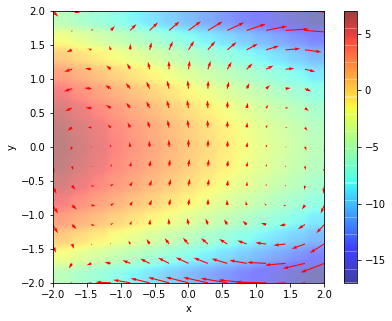

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Fx = F.components[r.i].subs([(r.x, 'x'), (r.y, 'y')])
Fy = F.components[r.j].subs([(r.x, 'x'), (r.y, 'y')]) 
Cs = C.subs([(r.x, 'x'), (r.y, 'y'), (r.k, 1)]) 

dx = np.linspace(-2.0, 2.0, 15) 
dy = np.linspace(-2.0, 2.0, 15) 
x,y = np.meshgrid(dx, dy)  

c = eval(str(Cs))
fx = eval(str(Fx))
fy = eval(str(Fy))

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
img = ax.imshow(c, extent=[-2, 2, -2, 2], origin='lower', interpolation='kaiser', 
                 clip_on=True, alpha=0.5, cmap='jet') 
fig.colorbar(img)
ax.quiver(x, y, fx, fy, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Numerický výpočet

Pomocou knižnice *numdiftools* určime rotáciu vektorového poľa $\mathbf{F}(x,y)$ z predchádzajúceho príkladu
v bode roviny $P(x,y) = (-1.5, 0.5)$. Numerické knižnice *numpy* a *numdiftools* nemajú priamu podporu výpočtu rotácie, pomožeme si preto výpočtom matice prvých parciálnych derivácií (Jacobian), definovanej ako 

\begin{equation*}
\mathbf J = \begin{bmatrix}
    \dfrac{\partial \mathbf{F}}{\partial x_1} & \cdots & \dfrac{\partial \mathbf{F}}{\partial x_n} \end{bmatrix}
= \begin{bmatrix}
    \dfrac{\partial F_1}{\partial x_1} & \cdots & \dfrac{\partial F_1}{\partial x_n}\\
    \vdots & \ddots & \vdots\\
    \dfrac{\partial F_m}{\partial x_1} & \cdots & \dfrac{\partial F_m}{\partial x_n} \end{bmatrix}
\end{equation*}

v našom dvojrozmernom prípade bude mať matica derivácií tvar

\begin{equation*}
\mathbf J 
= \begin{bmatrix}
    \dfrac{\partial F_x}{\partial x} &  \dfrac{\partial F_x}{\partial y}\\
    \dfrac{\partial F_y}{\partial x} &  \dfrac{\partial F_y}{\partial y} \end{bmatrix}
\end{equation*}


In [68]:
%reset -f 
import numdifftools as nd
import numpy as np

def F(p):
    [x,y] = p
    return np.array([ (-y*(1 - x - y**2) + x/4),  (2 - x**2 + y/4) ])

P = [-1.5, 0.5]
J = nd.Jacobian(F)
value = J(P)
print(value)

[[ 0.75 -1.75]
 [ 3.    0.25]]


Hodnotu rotácie určíme priamo pomocou prvkov matice Jacobiánu

\begin{equation*}
\mathrm{curl} \, \mathbf{F} = \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} 
\end{equation*}

In [71]:
curl = value[1,0] - value[0,1]
print(curl)

4.750000000000002
